In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('happy.csv')

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.columns = ['country', 'ladder', 'ladder_sd', 'positive_affect', 'negative_affect', 'social_support', 'freedom', 'corruption', 'generosity', 'gdp_per_capita', 'healthy_life_expectancy']

In [5]:
df.head(5)

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_per_capita,healthy_life_expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
country                    156 non-null object
ladder                     156 non-null int64
ladder_sd                  156 non-null int64
positive_affect            155 non-null float64
negative_affect            155 non-null float64
social_support             155 non-null float64
freedom                    155 non-null float64
corruption                 148 non-null float64
generosity                 155 non-null float64
gdp_per_capita             152 non-null float64
healthy_life_expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


## Adding a continent column

In [7]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia, 'Asia')
d_europe = dict.fromkeys(europe, 'Europe')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_australia = dict.fromkeys(australia, 'Australia')
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
df["continent"] = df["country"].map(continent_dict)
df.continent.fillna("Africa", inplace=True)

In [8]:
df.head()

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_per_capita,healthy_life_expectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe


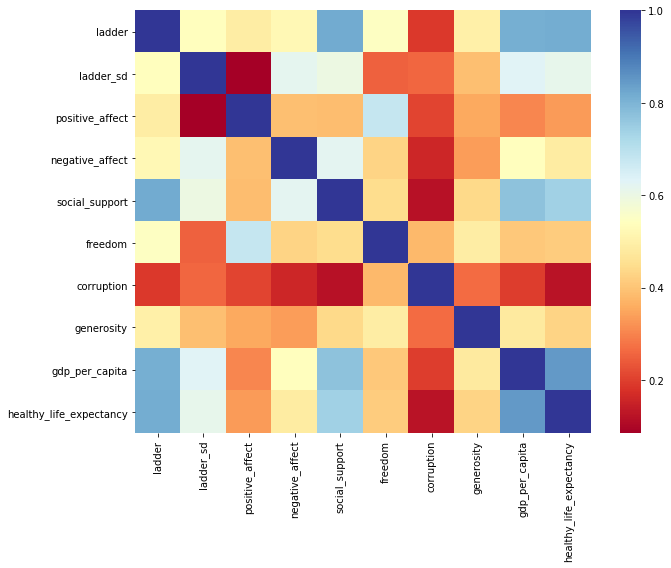

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdYlBu")
plt.tight_layout()
plt.savefig('t_corr.pdf')

In [10]:
df.to_csv('happiness.csv', index = False)

## Life expectancy accross the globe

In [11]:
data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           z = df['ladder'], 
           text = df['country'],
           colorbar = {'title':'Ladder'},
           colorscale = "Blues")
layout = dict(title = 'Life satisfaction ladder 2019', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
choromap = go.Figure(data = [data], layout=layout)
#iplot(choromap)
py.offline.init_notebook_mode(connected=True)
py.offline.plot(choromap, filename='map1.html', auto_open=False)

'map1.html'

In [12]:
p = sns.color_palette(["mediumseagreen", "sandybrown", "royalblue", "orangered", "saddlebrown", "darkorchid"])

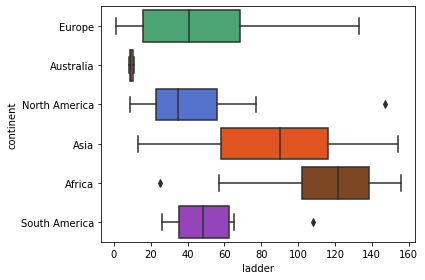

In [13]:
sns.boxplot(x="ladder", y="continent", data=df, palette=p)
plt.tight_layout()
plt.savefig('box.pdf')

In [39]:
asia = df[df.continent=="Asia"]
north_america = df[df.continent=="North America"]
europe = df[df.continent=="Europe"]

## How gdp per capita plays a role in all of these factors in North America

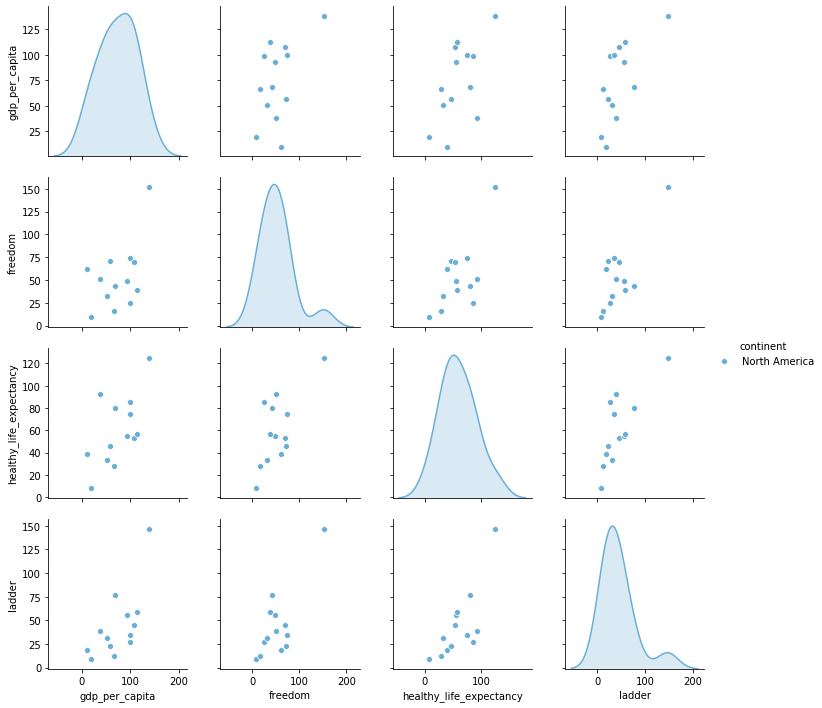

In [15]:
sns.pairplot(north_america[['gdp_per_capita', 'freedom', 'healthy_life_expectancy', 'ladder', 'continent']], hue='continent', palette="Blues")

In [16]:
##Correlation between freedom and life satisfaction in Asia

In [17]:
scatter1 = asia.iplot(kind='scatter', mode='markers',
                      x='freedom', y='ladder', text='country', color='orangered',
                      xTitle='Freedom', yTitle='Ladder',asFigure=True)
# scatter1.write_html('first_figure.html', auto_open=True)
py.offline.init_notebook_mode(connected=True)


py.offline.plot(scatter1, filename='scatter1.html', auto_open=False)

'scatter1.html'

In [18]:
data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           z = df['freedom'], 
           text = df['country'],
           colorbar = {'title':'Ladder'},
           colorscale = 'Reds')
layout = dict(title = 'Countries With Least Freedom', 
             geo = dict(showframe = False, 
                       projection = dict(type = 'equirectangular')))
choromap = go.Figure(data = [data], layout=layout)
# iplot(choromap)

import plotly as py
py.offline.init_notebook_mode(connected=True)
# py.offline.iplot(choromap, filename='myplot.html')
py.offline.plot(choromap, filename='map2.html', auto_open=False)
#py.plot(choromap,filename='sampleplot.html')
# plotly.offline.plot(choromap, filename = 'filename.html', auto_open=False)
#plotly.offline.plot(choromap, filename='map2.html')

'map2.html'

In [19]:
df2 = pd.read_csv('press_freedom.csv')

In [20]:
df2

,ISO,Rank2019,FR_Country,EN_country,ES_country,Score A,Sco Exa,Score 2019,Progression RANK,Rank 2018,Score 2018,Zone,AR_country,FA_country
0,NOR,1,Norvège,Norway,Noruega,"7,818673197",0,"7,82",0,1,"7,63",UE Balkans,النرويج,نروژ
1,FIN,2,Finlande,Finland,Finlandia,"7,900013541",0,"7,9",2,4,"10,26",UE Balkans,فنلندا,فنلاند
2,SWE,3,Suede,Sweden,Suecia,"8,309440514",0,"8,31",-1,2,"8,31",UE Balkans,السويد,سوئد
3,NLD,4,Pays-Bas,Netherlands,Países Bajos,"8,632713047",0,"8,63",-1,3,"10,01",UE Balkans,هولندا,هلند
4,DNK,5,Danemark,Denmark,Dinamarca,"9,867898622",0,"9,87",4,9,"13,99",UE Balkans,الدنمارك,دانمارک
5,CHE,6,Suisse,Switzerland,Suiza,"10,49295239","6,931471806","10,52",-1,5,"11,27",UE Balkans,سويسرا,سويیس
6,NZL,7,Nouvelle-Zélande,New Zealand,Nueva Zelanda,"10,75469817",0,"10,75",1,8,"13,62",Asie-Pacifique,نيوزيلاندا,زلاند نو
7,JAM,8,Jamaïque,Jamaica,Jamaica,"11,12505862",0,"11,13",-2,6,"11,33",Amériques,جامايكا,جامائیکا
8,BEL,9,Belgique,Belgium,Bélgica,"11,06520887","16,09437912","12,07",-2,7,"13,16",UE Balkans,بلجيكا,بلژیک
9,CRI,10,Costa Rica,Costa Rica,Costa Rica,"12,24322265",0,"12,24",0,10,"14,01",Amériques,كوستاريكا,کاستاریکا


In [21]:
df2 = df2.drop(columns = ['ISO','FR_Country','ES_country','Score A','Sco Exa','Score 2019','Progression RANK','Rank 2018','Score 2018','Zone','AR_country','FA_country'])

In [22]:
df2

,Rank2019,EN_country
0,1,Norway
1,2,Finland
2,3,Sweden
3,4,Netherlands
4,5,Denmark
5,6,Switzerland
6,7,New Zealand
7,8,Jamaica
8,9,Belgium
9,10,Costa Rica


In [23]:
df = pd.merge(left=df, right=df2, left_on='country', right_on='EN_country')

In [24]:
df=df.drop(columns=['EN_country'])

## Correlation between press freedom index and happiness index

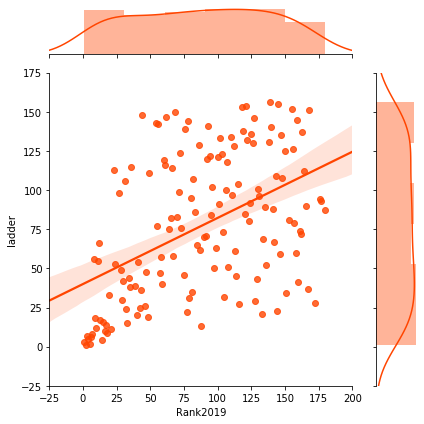

In [25]:
sns.jointplot("Rank2019", "ladder", data=df, kind='reg', color='orangered')
plt.ylim(-25, 175)
plt.xlim(-25, 200)
plt.tight_layout()
plt.savefig('press_happiness.pdf')

(-25, 200)

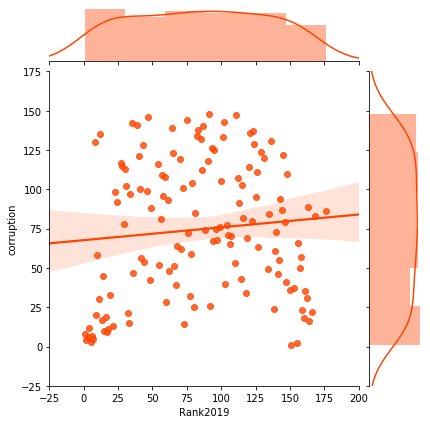

In [26]:
sns.jointplot("Rank2019", "corruption", data=df, kind='reg', color='orangered')
plt.ylim(-25, 175)
plt.xlim(-25, 200)

In [27]:

df3 = df.sort_values('freedom').reset_index().drop(columns=['index'])

In [28]:
df3.head()

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_per_capita,healthy_life_expectancy,continent,Rank2019
0,Uzbekistan,41,99,19.0,15.0,11.0,1.0,18.0,29.0,104.0,83.0,Asia,160
1,Cambodia,109,135,27.0,142.0,109.0,2.0,94.0,61.0,116.0,102.0,Asia,143
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe,1
3,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0,Asia,133
4,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe,2


In [29]:
df3 = df3.drop(columns = ['ladder','ladder_sd','positive_affect','negative_affect','social_support','freedom', 'corruption','generosity','gdp_per_capita','healthy_life_expectancy','continent','Rank2019'])

In [30]:
df3['free_rank']=df3.index+1

In [31]:
df3

,country,free_rank
0,Uzbekistan,1
1,Cambodia,2
2,Norway,3
3,United Arab Emirates,4
4,Finland,5
5,Denmark,6
6,Iceland,7
7,New Zealand,8
8,Canada,9
9,Sweden,10


In [32]:
df=pd.merge(left=df, right=df3, left_on='country', right_on='country')

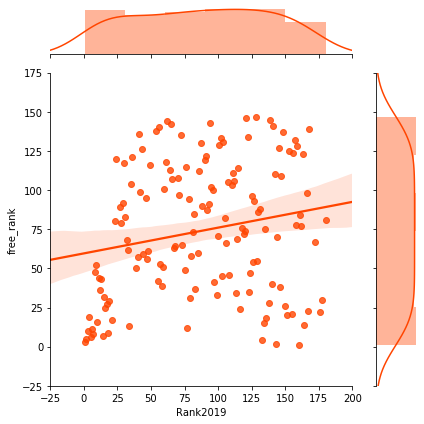

In [33]:
sns.jointplot("Rank2019", "free_rank", data=df, kind='reg', color='orangered')
plt.ylim(-25, 175)
plt.xlim(-25, 200)
plt.tight_layout()
plt.savefig('pressf_f.pdf')

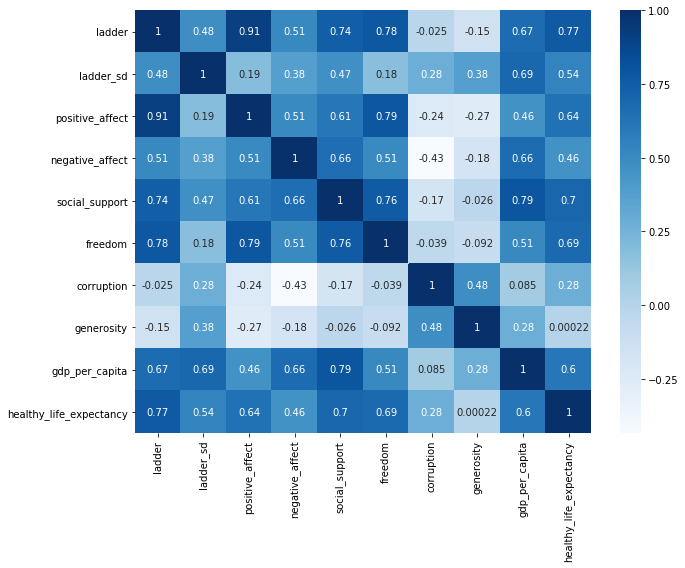

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(north_america.corr(), cmap="Blues", annot=True)
plt.tight_layout()
plt.savefig('NA.pdf')

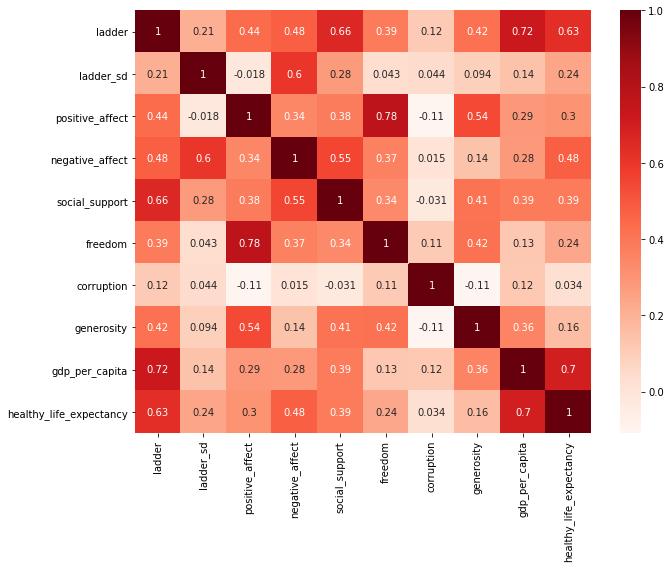

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(asia.corr(), cmap="Reds", annot=True)
plt.tight_layout()
plt.savefig('aisa.pdf')

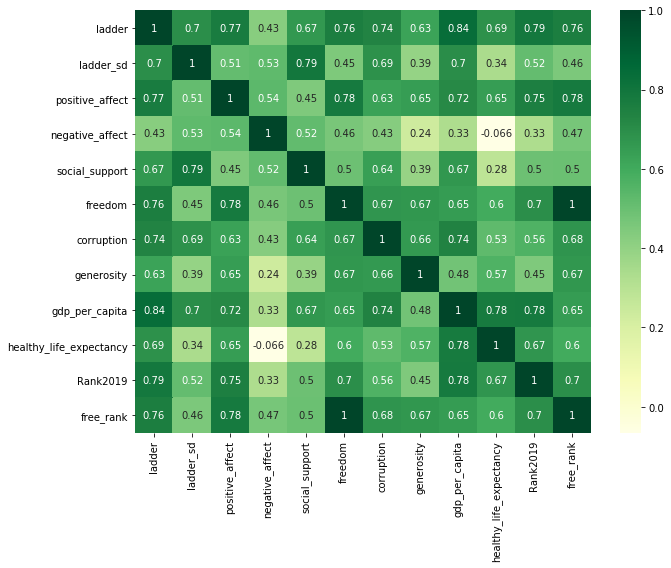

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(europe.corr(), cmap="YlGn", annot=True)
plt.tight_layout()
plt.savefig('eu.pdf')

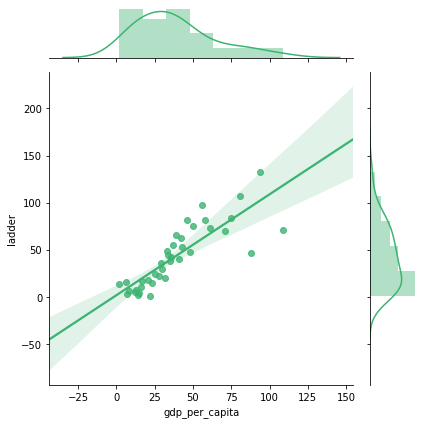

In [46]:
sns.jointplot("gdp_per_capita", "ladder", data=europe, kind='reg', color='mediumseagreen')
plt.tight_layout()
plt.savefig('euc.pdf')

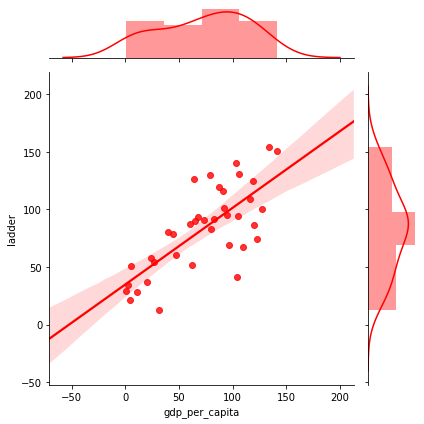

In [47]:
sns.jointplot("gdp_per_capita", "ladder", data=asia, kind='reg', color='red')
plt.tight_layout()
plt.savefig('asc.pdf')

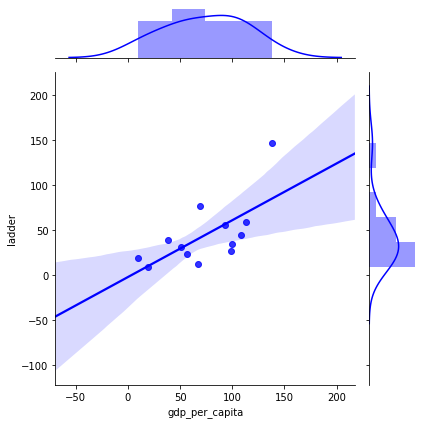

In [48]:
sns.jointplot("gdp_per_capita", "ladder", data=north_america, kind='reg', color='blue')
plt.tight_layout()
plt.savefig('nac.pdf')